# Szeregowanie zadań na identycznych maszynach

Natalia Sobala 258096

## Wprowadzenie

Szeregowanie zadań to jeden z podstawowych problemów optymalizacyjnych występujących w informatyce, przemyśle i zarządzaniu projektami. Celem jest ustalenie kolejności wykonywania zadań w taki sposób, aby zoptymalizować wybraną funkcję celu (np. czas oczekiwania, czas zakończenia, opóźnienie).

W tym projekcie rozpatrujemy klasyczny problem: mamy $n$ zadań do wykonania oraz $m$ identycznych maszyn, na których możemy je uruchamiać. Każde zadanie $J_j$ posiada znany czas wykonania $p_j$. 
Zostaną zaimplementowane i porównane dwa klasyczne podejścia do tego problemu: $\textbf{algorytm SPT}$ i $\textbf{algorytm LPT}$.

## Opis problemu i przyjęte założenia

Zakładamy, że:

- wszystkie maszyny są identyczne (tzn. wykonanie danego zadania trwa tyle samo na każdej z nich),

- zadania są znane z góry,

- każde zadanie może zostać przypisane tylko jednej maszynie,

- zadania nie mogą być przerywane.

Rozpatrujemy dwa główne kryteria optymalizacji:

1. Minimalizacja średniego czasu oczekiwania na wykonanie zadania – istotne w przypadku systemów, gdzie liczy się sprawiedliwa i szybka obsługa uzytkowników (np. kolejkowanie zleceń).

2. Minimalizacja maksymalnego czasu zakończenia (makespan) – ważne w kontekście produkcji lub przetwarzania wsadowego, gdzie chodzi o to, by wszystkie zadania skończyły się jak najszybciej.

## Minimalizacja średniego czasu oczekiwania

Minimalizacja średniego czasu oczekiwania przy użyciu metody $\textbf{SPT}$ (*Shortest Processing Time*) to strategia, która minimalizuje średni czas, jaki zadania muszą spędzić w kolejce oczekując na obsłużenie. SPT oznacza, że zadanie o najkrótszym czasie przetwarzania jest obsługiwane jako pierwsze. Działa optymalnie w przypadku jednej maszyny.

Dlaczego działa:
>Jeśli zaczniemy od najkrótszego zadania, to szybko się ono zakończy i „odblokuje” kolejkę. Krótsze czasy wykonania na początku zmniejszają sumaryczne opóźnienia późniejszych zadań.

Działanie algorytmu:
- Sortuje zadania rosąnco według czasu przetwarzania $p_j$.

- Wykonuje je w tej kolejnosci.


Zalety:
- Prosty i szybki.

- Gwarantuje optymalne rozwiazanie dla jednej maszyny.

In [ ]:
from heapq import heappush, heappop

# Algorytm SPT (Shortest Processing Time First)
def spt_schedule(jobs):
    jobs.sort()  # sortuje rosnąco wg p_j
    current_time = 0
    completion_times = []
    waiting_time_total = 0
    for job in jobs:
        waiting_time_total += current_time
        current_time += job
        completion_times.append(current_time)
    avg_waiting_time = waiting_time_total / len(jobs)
    return {"order": jobs,
            "completion_times": completion_times,
            "average_wait_time": avg_waiting_time}

## Minimalizacja maksymalnego czasu zakończenia

Minimalizacja maksymalnego czasu zakończenia to metoda planowania w produkcji i logistyce, która polega na priorytetowym planowaniu zadań o najdłuższych czasach realizacji. Celem jest redukcja ogólnego czasu zakończenia wszystkich zadań, Problem ten jest NP-trudny dla $m > 1$, ale istnieje prosta heurystyka $\textbf{LPT}$ (*Longest Processing Time First*), która daje dobre przybliżenie.

Dlaczego działa:
>Gdy przypisujemy długie zadania jako pierwsze do najmniej obciążonych maszyn, równoważymy pracę maszyn już od początku. Zbyt późne przydzielenie długiego zadania mogłoby „przeciążyć” jedną z maszyn.

Działanie algorytmu:

* Sortuje zadania malejącego według czasu przetwarzania $p_j$, tak aby zadanie o najdłuższym czasie przetwarzania było pierwsze.

* Przypisuje każde zadanie do maszyny, na której całkowity czas przetwarzania zaplanowanych zadań jest najkrótszy.

LPT zapewnia rozwiązanie nie gorsze niż $(\frac{4}{3} - \frac{1}{3m})$ razy optymalne.

In [ ]:
# Algorytm LPT (Longest Processing Time First) dla m maszyn
def lpt_schedule(jobs, m):
    jobs.sort(reverse=True)  # sortuje malejąco wg p_j
    machines = [(0, i) for i in range(m)]  # (czas zajęcia, id maszyny)
    schedule = [[] for _ in range(m)]
    
    for job in jobs:
        time, i = heappop(machines)
        schedule[i].append(job)
        heappush(machines, (time + job, i))

    max_completion_time = max(sum(q) for q in schedule)
    return {"schedule": schedule,
            "max_completion_time": max_completion_time}

### Przykład działania

In [ ]:
if __name__ == "__main__":
    jobs = [5, 2, 7, 1, 3]
    job_names = ['A', 'B', 'C', 'D', 'E']
    m = 2

    jobs_with_names = list(zip(job_names, jobs))

    for job in jobs_with_names:
        print(f"Zadanie: {job[0]}, Czas: {job[1]}")
        
    # SPT
    print("\nAlgorytm SPT (1 maszyna):")
    # Sortuje według czasu
    spt_sorted = sorted(jobs_with_names, key=lambda x: x[1])
    order = [job[0] for job in spt_sorted] # kolejność nazw
    completion_times = []
    current_time = 0
    for _, time in spt_sorted:
        current_time += time
        completion_times.append(current_time)
    average_wait_time = sum(completion_times) / len(completion_times)

    print("Kolejność:", order)
    print("Czasy zakończenia:", completion_times)
    print("Średni czas oczekiwania:", round(average_wait_time, 2))

    # LPT
    print("\nAlgorytm LPT (2 maszyny):")
    lpt_sorted = sorted(jobs_with_names, key=lambda x: x[1], reverse=True)
    machines = [[] for _ in range(m)]
    machines_times = [0] * m

    for job, time in lpt_sorted:
        # Znajduje maszynę z najmniejszym łącznym czasem
        idx = machines_times.index(min(machines_times))
        machines[idx].append((job, time))
        machines_times[idx] += time

    for i, machine in enumerate(machines):
        tasks = [j for j, _ in machine]
        total_time = sum(t for _, t in machine)
        print(f"Maszyna {i+1}: zadania {tasks}, czas: {total_time}")
    print("Maksymalny czas zakończenia (makespan):", max(machines_times))


Zadanie: A, Czas: 5
Zadanie: B, Czas: 2
Zadanie: C, Czas: 7
Zadanie: D, Czas: 1
Zadanie: E, Czas: 3

Algorytm SPT (1 maszyna):
Kolejność: ['D', 'B', 'E', 'A', 'C']
Czasy zakończenia: [1, 3, 6, 11, 18]
Średni czas oczekiwania: 7.8

Algorytm LPT (2 maszyny):
Maszyna 1: zadania ['C', 'B'], czas: 9
Maszyna 2: zadania ['A', 'E', 'D'], czas: 9
Maksymalny czas zakończenia (makespan): 9


- Co gdyby użyć LPT zamiast SPT?

Długie zadania na początku opóźniają wszystkie kolejne, więc średni czas oczekiwania będzie większy.



- Co gdyby użyć SPT zamiast LPT?

Wtedy długie zadania mogą „wpaść” wszystkie na jedną maszynę pod koniec, co skutkuje nierównym obciążeniem i długim makespanem.

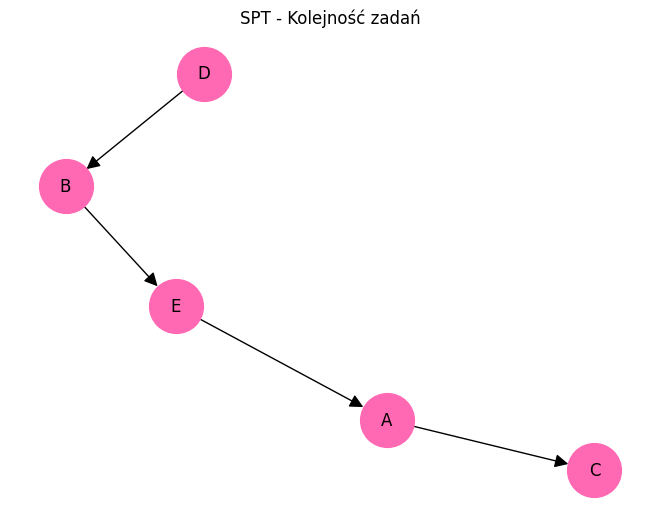

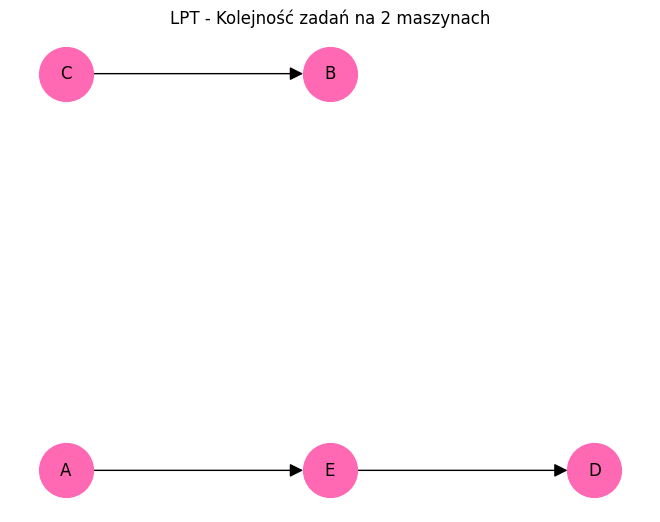

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_task_order_graph(order, title="Graf kolejności zadań"):
    G = nx.DiGraph()
    for i in range(len(order) - 1):
        G.add_edge(order[i], order[i+1])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='hotpink', node_size=1500, arrowsize=20)
    plt.title(title)
    plt.show()

def draw_LPT_schedule_graph(schedule, title="LPT - Harmonogram na maszynach"):
    G = nx.DiGraph()
    pos = {}
    y_gap = 3
    for machine_idx, tasks in enumerate(schedule):
        y = -machine_idx * y_gap
        for i in range(len(tasks)):
            G.add_node(tasks[i])
            pos[tasks[i]] = (i, y)
            if i > 0:
                G.add_edge(tasks[i-1], tasks[i])
    nx.draw(G, pos, with_labels=True, node_color='hotpink', node_size=1500, arrowsize=20)
    plt.title(title)
    plt.show()

spt_order = ['D', 'B', 'E', 'A', 'C']

lpt_schedule = [
    ['C', 'B'],       # Maszyna 1
    ['A', 'E', 'D']    # Maszyna 2
]

smith_order = ['C', 'A', 'B']
edd_order = ['B', 'A', 'C']

draw_task_order_graph(spt_order, "SPT - Kolejność zadań")
draw_LPT_schedule_graph(lpt_schedule, "LPT - Kolejność zadań na 2 maszynach")

## Minimalizacja średniego czasu oczekiwania, gdy każde zadanie ma swoją wagę (koszt opóźnienia)

Każde zadanie $J_j$ ma dodatkowo wagę $w_j$, która reprezentuje jego koszt opóźnienia. Celem jest minimalizacja ważonego czasu oczekiwania:

$$\sum_j w_j\cdot C_j,$$

gdzie $C_j$ to czas zakończenia zadania $J_j$.

Reguła Smitha mówi, że: 

>Dla jednej maszyny optymalna kolejność zadań to taka, która sortuje je według rosnącego stosunku $p_j / w_j$.

Jeśli zadanie ma dużą wagę (koszt opóźnienia), powinno być wykonane wcześniej — chyba że jest bardzo długie. Iloraz $p_j / w_j$ to kompromis: niskie wartości oznaczają „opłacalne” zadania.

In [ ]:
def smith_rule_schedule(jobs):
    # jobs to lista krotek: (nazwa, (czas p_j, waga w_j))
    # sortuje według p_j / w_j rosnąco (zasada Smitha)
    jobs.sort(key=lambda x: x[1][0] / x[1][1])
    current_time = 0
    weighted_sum = 0
    order = []
    for name, (p, w) in jobs:
        current_time += p
        weighted_sum += w * current_time
        order.append((name, p, w))
    return {"order": order, "weighted_sum_completion_time": weighted_sum}

In [5]:
jobs = [('A', (5, 2)), ('B', (3, 1)), ('C', (2, 3))]  # (nazwa, (czas, waga))
result = smith_rule_schedule(jobs)
print("Kolejność (nazwa, p_j, w_j):", result["order"])
print("Suma w_j * C_j:", result["weighted_sum_completion_time"])

Kolejność (nazwa, p_j, w_j): [('C', 2, 3), ('A', 5, 2), ('B', 3, 1)]
Suma w_j * C_j: 30


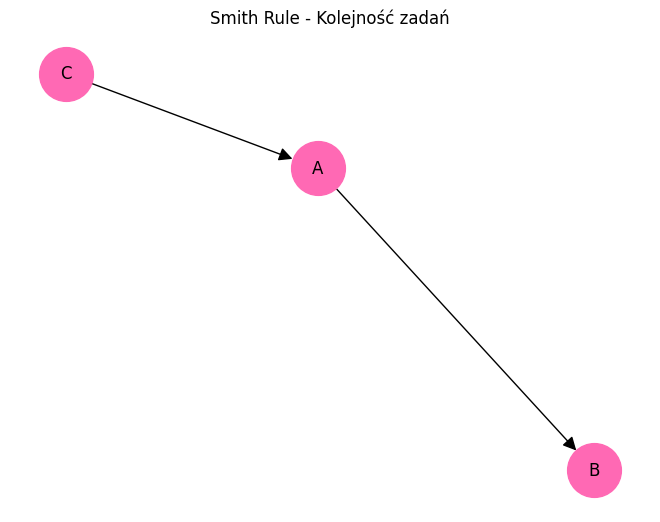

In [16]:
draw_task_order_graph(smith_order, "Smith Rule - Kolejność zadań")

## Minimalizacja liczby zadań spóźnionych

Każde zadanie $J_j$ ma termin $d_j$, do którego powinno się zakończyć. Celem jest minimalizacja liczby zadań spóźnionych.

Dla jednej maszyny można zastosować algorytm Earliest Due Date ($\textbf{EDD}$), który sortuje zadania według rosnących terminów. Gdy najpierw wykonujemy zadania z najwcześniejszym terminem, ograniczamy ryzyko przekroczenia deadline'ów. W przypadku jednej maszyny jest to rozwiązanie optymalne.

In [ ]:
def edd_schedule(jobs):
    # jobs to lista krotek (nazwa, (czas p_j, deadline d_j))
    jobs.sort(key=lambda x: x[1][1])  # sortuje wg deadline d_j
    current_time = 0
    late_jobs = 0
    schedule = []
    for name, (p, d) in jobs:
        current_time += p
        late = current_time > d
        if late:
            late_jobs += 1
        schedule.append((name, p, d, current_time, late))
    return {"schedule": schedule, "late_jobs": late_jobs}

In [7]:
jobs = [('A', (4, 6)), ('B', (2, 5)), ('C', (3, 7))]
result = edd_schedule(jobs)
for name, p, d, c, late in result["schedule"]:
    print(f"Zadanie {name}: czas = {p}, deadline = {d}, zakończenie = {c}, spóźnione = {late}")
print("Liczba spóźnionych zadań:", result["late_jobs"])

Zadanie B: czas = 2, deadline = 5, zakończenie = 2, spóźnione = False
Zadanie A: czas = 4, deadline = 6, zakończenie = 6, spóźnione = False
Zadanie C: czas = 3, deadline = 7, zakończenie = 9, spóźnione = True
Liczba spóźnionych zadań: 1


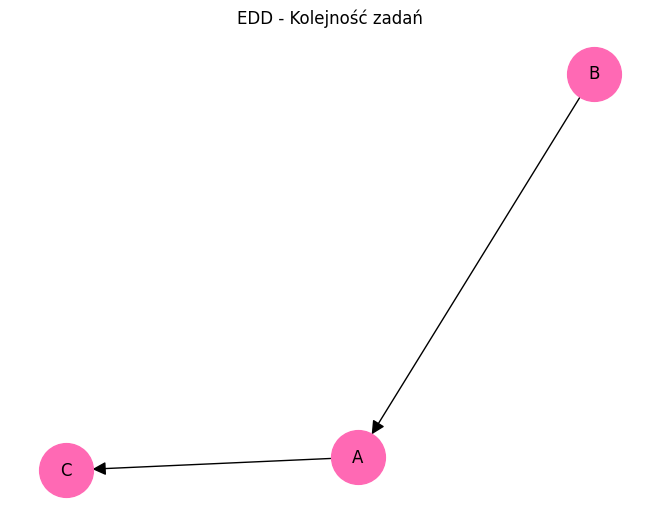

In [19]:
draw_task_order_graph(edd_order, "EDD - Kolejność zadań")

## Bibliografia

* [https://en.wikipedia.org/wiki/Identical-machines_scheduling](https://en.wikipedia.org/wiki/Identical-machines_scheduling)
* [https://en.wikipedia.org/wiki/Optimal_job_scheduling](https://en.wikipedia.org/wiki/Optimal_job_scheduling)
* [https://en.wikipedia.org/wiki/Longest-processing-time-first_scheduling](https://en.wikipedia.org/wiki/Longest-processing-time-first_scheduling)
